# DATA CLEANING

# TRI Clinical Trial
###### <font color='gray'>By: Jeonwook Kang

---

In [1]:
import pandas as pd
import sqlite3 as sql
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import csv file into pandas dataframe

adverse_data = pd.read_csv("data/adae.csv")
other_data = pd.read_csv("data/ADLBC.csv")

## Data Cleaning/Exploratory Data Analysis

In [3]:
# checking for the number of unique clinical trial subjects with adverse effects

adverse_count = list(adverse_data["usubjid"].drop_duplicates())
len(adverse_count)

225

In [4]:
# checking for the total number of unique clinical trial subjects

total_count = list(other_data["usubjid"].drop_duplicates())
len(total_count)

254

In [5]:
# confirming that all the subjects in adae dataset is also included in the overall data

checking = total_count.copy()
for x in adverse_count:
    if x in total_count:
        checking.remove(x)
len(checking)

29

In [6]:
(225/254) * 100

88.58267716535433

**Note:**
Out of 254 subjects, 225 subjects (88.6%) is reported to have some type of adverse effect.

In [7]:
# checking for number of unique items in each column to determine which columns are to be considered

dicts = {}

for x in adverse_data.columns:
    dicts[x] = len(adverse_data[x].value_counts())
dicts

{'usubjid': 225,
 'aeseq': 23,
 'studyid': 1,
 'domain': 1,
 'siteid': 17,
 'subjid': 225,
 'aeterm': 492,
 'aedecod': 242,
 'aebodsys': 23,
 'aesev': 3,
 'aeser': 2,
 'aesern': 2,
 'aerel': 4,
 'dsreasae': 1,
 'ontrtfl': 2,
 'trtemfl': 2,
 'aefn': 1,
 'bodfn': 1,
 'decodfn': 1,
 'saefn': 1,
 'sdecodfn': 1,
 'sbodfn': 1,
 'aedermfn': 1,
 'aestdt': 427,
 'aestdtf': 1,
 'aestdy': 179,
 'anlstdy': 179,
 'aeendt': 280,
 'aeendy': 145,
 'trtp': 3,
 'trtpcd': 3,
 'trtpn': 3,
 'age': 35,
 'agegrp': 3,
 'agegrpn': 3,
 'race': 4,
 'racen': 4,
 'sex': 2,
 'safety': 1,
 'itt': 1,
 'efficacy': 2,
 'complt24': 2,
 'aedict': 1,
 'aescan': 2,
 'aescong': 1,
 'aesdisab': 2,
 'aesdth': 2,
 'aeshosp': 2,
 'aeslife': 2,
 'hlgterm': 242,
 'hlterm': 242,
 'llterm': 326,
 'lstdosdt': 193,
 'trtdur': 111,
 'trtstdt': 187}

**Note:** Above information represents unique item in each column. Columns with too many unique items will be excluded for analysis purposes. For example, *aedecod*(specific conditions) has 242 unique conditions so *aebodsys*(Body System) which has only 23 unique systems will be used instead. 

In [8]:
dict(adverse_data['llterm'].value_counts())

{'APPLICATION SITE ITCHING': 77,
 'ITCHING': 55,
 'ERYTHEMA': 51,
 'RASH': 45,
 'APPLICATION SITE RASH': 36,
 'APPLICATION SITE REDNESS': 32,
 'DIZZINESS': 26,
 'APPLICATION SITE IRRITATION': 24,
 'SINUS BRADYCARDIA': 22,
 'SKIN IRRITATION': 21,
 'NAUSEA': 21,
 'COUGH': 20,
 'UPPER RESPIRATORY INFECTION': 19,
 'HEADACHE': 18,
 'APPLICATION SITE BURNING': 17,
 'DIARRHEA': 17,
 'VOMITING': 14,
 'APPLICATION SITE ERYTHEMA': 14,
 'PRURITUS': 13,
 'APPLICATION SITE BLISTER': 11,
 'FATIGUE': 9,
 'PERSPIRATION EXCESSIVE': 9,
 'COLD SYMPTOMS': 9,
 'COLD': 9,
 'BLISTERS': 8,
 'SYNCOPE': 8,
 'ITCHY': 7,
 'NASAL CONGESTION': 7,
 'ATRIAL FIBRILLATION': 6,
 'ST SEGMENT DEPRESSED': 6,
 'PRURITIS': 6,
 'CHILLS': 6,
 'CONFUSION': 6,
 'WELTS': 5,
 'GENERALIZED PRURITUS': 5,
 'SWEATING': 5,
 'ABDOMINAL PAIN': 5,
 'MYOCARDIAL INFARCTION': 5,
 'MALAISE': 5,
 'ABRASIONS': 5,
 'AV BLOCK SECOND DEGREE': 5,
 'SEPTAL MYOCARDIAL INFARCTION': 5,
 'HYPERTENSION': 5,
 'KNEE PAIN': 4,
 'TRANSIENT ISCHEMIC ATTACKS':

In [9]:
# checking for any missing values

adverse_data.isna().sum()

usubjid        0
aeseq          0
studyid        0
domain         0
siteid         0
subjid         0
aeterm         0
aedecod        0
aebodsys       0
aesev          0
aeser          0
aesern         0
aerel          4
dsreasae     687
ontrtfl        0
trtemfl        0
aefn         973
bodfn        641
decodfn      410
saefn       1188
sdecodfn    1188
sbodfn      1188
aedermfn     698
aestdt        11
aestdtf     1176
aestdy        11
anlstdy       11
aeendt       473
aeendy       473
trtp           0
trtpcd         0
trtpn          0
age            0
agegrp         0
agegrpn        0
race           0
racen          0
sex            0
safety         0
itt            0
efficacy       0
complt24       0
aedict         0
aescan         0
aescong        0
aesdisab       0
aesdth         0
aeshosp        0
aeslife        0
hlgterm        0
hlterm         0
llterm         0
lstdosdt       0
trtdur         0
trtstdt        0
dtype: int64

**Note:**
*aesev*(Severity/Intensity) and *aerel*(Causality) is the top two indicator of an adverse effect related to the use of Xanomeline. Other relavant columns include *trtp*(Control/Experimental Group) and *agegrp*(Age group). As we can see from above, only 4 rows are missing in the causality column, thus those missing rows will be excluded from the analysis.

In [10]:
# filtering out and cleaning the dataframe with target columns

adverse_data = adverse_data[["subjid", "aeser", "aesev", "aerel", "trtp", "aebodsys", "agegrp"]]
adverse_data.dropna(inplace=True)
adverse_data.head(20)

,subjid,aeser,aesev,aerel,trtp,aebodsys,agegrp
0,1015,N,MILD,PROBABLE,Placebo,GENERAL DISORDERS AND ADMINISTRATION SITE COND...,<65
1,1015,N,MILD,PROBABLE,Placebo,GENERAL DISORDERS AND ADMINISTRATION SITE COND...,<65
2,1015,N,MILD,REMOTE,Placebo,GASTROINTESTINAL DISORDERS,<65
3,1023,N,MILD,POSSIBLE,Placebo,SKIN AND SUBCUTANEOUS TISSUE DISORDERS,<65
4,1023,N,MODERATE,PROBABLE,Placebo,SKIN AND SUBCUTANEOUS TISSUE DISORDERS,<65
5,1023,N,MILD,POSSIBLE,Placebo,CARDIAC DISORDERS,<65
6,1023,N,MILD,POSSIBLE,Placebo,SKIN AND SUBCUTANEOUS TISSUE DISORDERS,<65
7,1028,N,MILD,POSSIBLE,Xanomeline High Dose,GENERAL DISORDERS AND ADMINISTRATION SITE COND...,65-80
8,1028,N,MILD,PROBABLE,Xanomeline High Dose,GENERAL DISORDERS AND ADMINISTRATION SITE COND...,65-80
9,1034,N,MILD,PROBABLE,Xanomeline High Dose,GENERAL DISORDERS AND ADMINISTRATION SITE COND...,65-80


**Note:** After filtering out the target columns we can see that there are multiple records of adverse effect from a single subject which could cause a weighted bias in the analysis. Therefore the dataframe will be further engineered to contain only the highest priority row for each subject. The priority was determined by using *aesev* (Intensity) column.

In [11]:
# selecting the row with highest priority and dropping rows with other duplicate subjects
# higher order of selection is made by aerel(causality) column

subject = list(adverse_data["subjid"].drop_duplicates())

df = pd.DataFrame()
for x in subject:
    df_initial = adverse_data[adverse_data["subjid"] == x]
    if len(df_initial) > 1:
        if "SEVERE" in list(df_initial["aesev"]):
            df_temp = df_initial[df_initial["aesev"] == "SEVERE"]
            df_temp = df_temp.sort_values("aerel")
            df_temp = df_temp.drop_duplicates(subset = ['subjid'], keep = "last")
        elif "MODERATE" in list(df_initial["aesev"]):
            df_temp = df_initial[(df_initial["aesev"] == "MODERATE")]
            df_temp = df_temp.sort_values("aerel")
            df_temp = df_temp.drop_duplicates(subset = ["subjid"], keep = "last")
        else:
            df_temp = df_initial.sort_values("aerel")
            df_temp = df_initial.drop_duplicates(subset = ["subjid"], keep = "last")
        df = df.append(df_temp)
    elif len(df_initial) == 1:
        df = df.append(df_initial)
        
df.reset_index(inplace=True)
df.drop(columns=["index"], inplace=True)
df

,subjid,aeser,aesev,aerel,trtp,aebodsys,agegrp
0,1015,N,MILD,REMOTE,Placebo,GASTROINTESTINAL DISORDERS,<65
1,1023,N,MODERATE,PROBABLE,Placebo,SKIN AND SUBCUTANEOUS TISSUE DISORDERS,<65
2,1028,N,MILD,PROBABLE,Xanomeline High Dose,GENERAL DISORDERS AND ADMINISTRATION SITE COND...,65-80
3,1034,N,MILD,POSSIBLE,Xanomeline High Dose,GENERAL DISORDERS AND ADMINISTRATION SITE COND...,65-80
4,1047,N,MODERATE,NONE,Placebo,GASTROINTESTINAL DISORDERS,>80
...,...,...,...,...,...,...,...
219,1254,N,MODERATE,REMOTE,Xanomeline Low Dose,NERVOUS SYSTEM DISORDERS,65-80
220,1328,N,MODERATE,PROBABLE,Xanomeline High Dose,GENERAL DISORDERS AND ADMINISTRATION SITE COND...,>80
221,1355,N,MODERATE,REMOTE,Placebo,VASCULAR DISORDERS,65-80
222,1371,Y,SEVERE,NONE,Xanomeline High Dose,NERVOUS SYSTEM DISORDERS,65-80


In [12]:
df["aesev"].value_counts()

MODERATE    117
MILD         77
SEVERE       30
Name: aesev, dtype: int64

In [13]:
adverse_data.dropna(inplace=True)

In [14]:
adverse_data.head()

,subjid,aeser,aesev,aerel,trtp,aebodsys,agegrp
0,1015,N,MILD,PROBABLE,Placebo,GENERAL DISORDERS AND ADMINISTRATION SITE COND...,<65
1,1015,N,MILD,PROBABLE,Placebo,GENERAL DISORDERS AND ADMINISTRATION SITE COND...,<65
2,1015,N,MILD,REMOTE,Placebo,GASTROINTESTINAL DISORDERS,<65
3,1023,N,MILD,POSSIBLE,Placebo,SKIN AND SUBCUTANEOUS TISSUE DISORDERS,<65
4,1023,N,MODERATE,PROBABLE,Placebo,SKIN AND SUBCUTANEOUS TISSUE DISORDERS,<65


In [15]:
df["aerel"].value_counts()

PROBABLE    80
NONE        54
POSSIBLE    51
REMOTE      39
Name: aerel, dtype: int64

In [16]:
subject = list(adverse_data["subjid"].drop_duplicates())

In [17]:
df["trtp"].value_counts()

Xanomeline High Dose    79
Xanomeline Low Dose     76
Placebo                 69
Name: trtp, dtype: int64

**Note:** Since we are more interested in the possible causal effect between Xanomeline use and it's adversary effects, rows with None value in the aerel(causality) column are intentionally dropped if there were alternative values in that column. However, this was done only for the subject who experienced more than one effects.

In [18]:
# exporting final cleaned dataset into the file

df.to_csv("data/cleaned_adae.csv")

In [19]:
(79+76)/(79+76+69)

0.6919642857142857

**Note:** Out of the subjects that experienced adversary effects, 69% of them were in the treatment group. It's evident that the remaining 31% of the subjects experienced a placebo effect.

---

## Statistical Analysis

In [20]:
# assigned numerical values to severity and causality column to compare treatment and control group

df['severity_number'] = df.aesev.map({"MILD":0, "MODERATE":1, "SEVERE":2})
df['causality_number'] = df.aerel.map({"NONE":0, "REMOTE":1, "POSSIBLE":2, "PROBABLE":3})
df

,subjid,aeser,aesev,aerel,trtp,aebodsys,agegrp,severity_number,causality_number
0,1015,N,MILD,REMOTE,Placebo,GASTROINTESTINAL DISORDERS,<65,0,1
1,1023,N,MODERATE,PROBABLE,Placebo,SKIN AND SUBCUTANEOUS TISSUE DISORDERS,<65,1,3
2,1028,N,MILD,PROBABLE,Xanomeline High Dose,GENERAL DISORDERS AND ADMINISTRATION SITE COND...,65-80,0,3
3,1034,N,MILD,POSSIBLE,Xanomeline High Dose,GENERAL DISORDERS AND ADMINISTRATION SITE COND...,65-80,0,2
4,1047,N,MODERATE,NONE,Placebo,GASTROINTESTINAL DISORDERS,>80,1,0
...,...,...,...,...,...,...,...,...,...
219,1254,N,MODERATE,REMOTE,Xanomeline Low Dose,NERVOUS SYSTEM DISORDERS,65-80,1,1
220,1328,N,MODERATE,PROBABLE,Xanomeline High Dose,GENERAL DISORDERS AND ADMINISTRATION SITE COND...,>80,1,3
221,1355,N,MODERATE,REMOTE,Placebo,VASCULAR DISORDERS,65-80,1,1
222,1371,Y,SEVERE,NONE,Xanomeline High Dose,NERVOUS SYSTEM DISORDERS,65-80,2,0


In [21]:
# filtered out necessary components from the complete dataframe

df_placebo = df[df['trtp'] == "Placebo"][['severity_number','causality_number']]
df_lowdose = df[df['trtp'] == "Xanomeline Low Dose"][['severity_number','causality_number']]
df_highdose = df[df['trtp'] == "Xanomeline High Dose"][['severity_number','causality_number']]

In [22]:
# forming a array of numbers to perform two sample t-test to check for statistical significance

sn_placebo = np.array(df_placebo['severity_number'])
sn_lowdose = np.array(df_lowdose['severity_number'])
sn_highdose = np.array(df_highdose['severity_number'])

cn_placebo = np.array(df_placebo['causality_number'])
cn_lowdose = np.array(df_lowdose['causality_number'])
cn_highdose = np.array(df_highdose['causality_number'])

In [23]:
# test between control and lowdose treatment group for severity measure

stats.ttest_ind(sn_placebo, sn_lowdose)

Ttest_indResult(statistic=-3.28957548962266, pvalue=0.0012634149586116163)

In [24]:
# test between control and highdose treatment group for severity measure
stats.ttest_ind(sn_placebo, sn_highdose)

Ttest_indResult(statistic=-2.333862168963595, pvalue=0.020966936352000188)

In [25]:
# test between control and lowdose treatment group for causality measure

stats.ttest_ind(cn_placebo, cn_lowdose)

Ttest_indResult(statistic=-4.744230998610411, pvalue=5.017206063473769e-06)

In [26]:
# test between control and highdose treatment group for causality measures
stats.ttest_ind(cn_placebo, cn_highdose)

Ttest_indResult(statistic=-3.8828389644290118, pvalue=0.00015593763989594627)

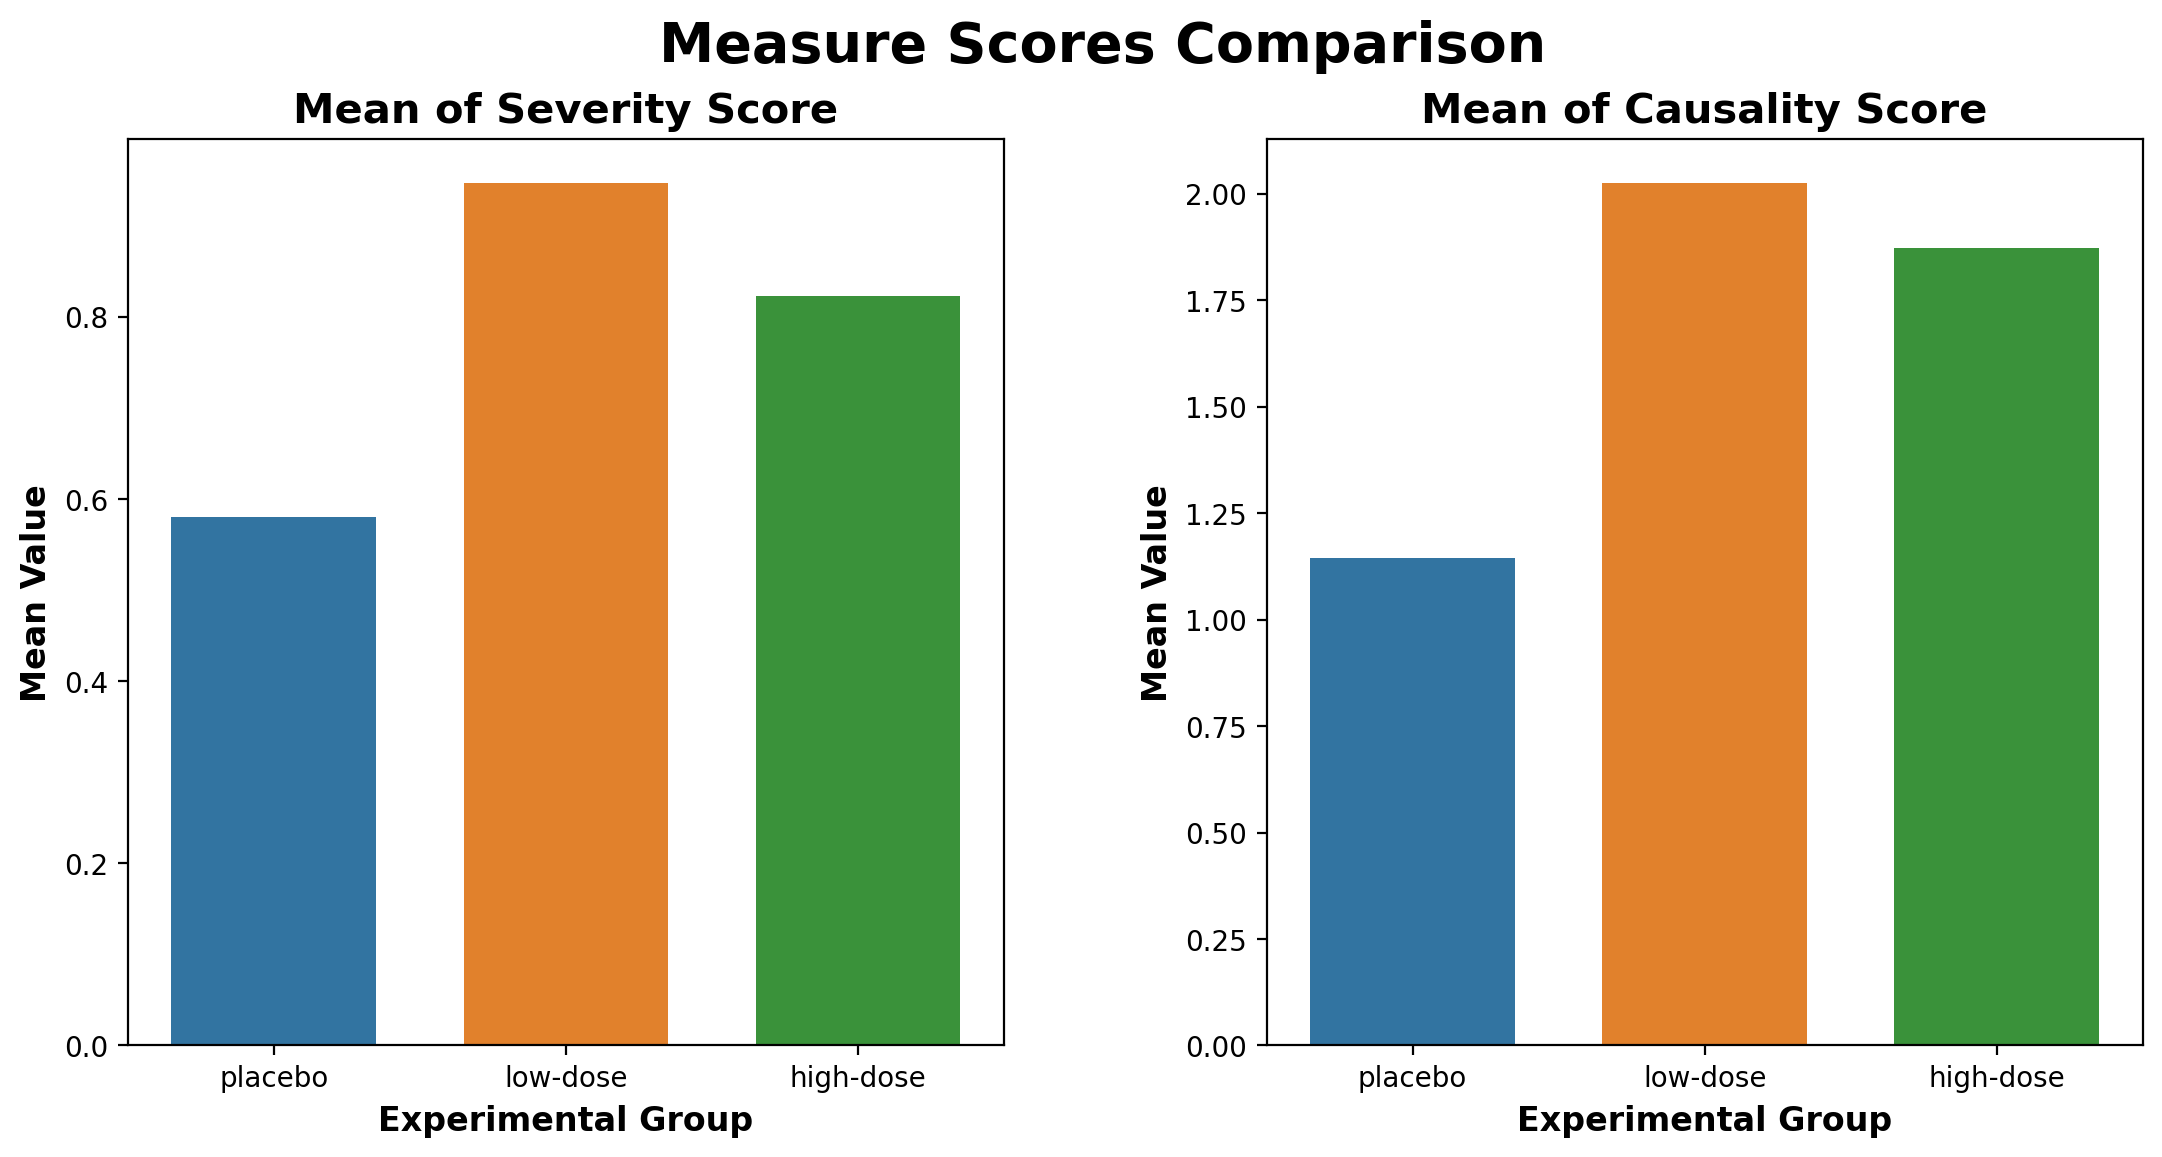

In [27]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)

fig, (ax1, ax2) = plt.subplots(figsize=(13,6), ncols=2, dpi=200)

x= ["placebo", "low-dose", "high-dose"]
y= [sn_placebo.mean(), sn_lowdose.mean(), sn_highdose.mean()]
y1= [cn_placebo.mean(), cn_lowdose.mean(), cn_highdose.mean()]

sns.barplot(x=x, y=y, ax=ax1)
ax1.set_title('Mean of Severity Score', fontweight='bold', fontsize=15)
ax1.set_xlabel('Experimental Group', fontweight='bold', fontsize=12)
ax1.set_ylabel('Mean Value', fontweight='bold', fontsize=12)
change_width(ax1, 0.7)

sns.barplot(x=x, y=y1, ax=ax2)
ax2.set_title('Mean of Causality Score', fontweight='bold', fontsize=15)
ax2.set_xlabel('Experimental Group', fontweight='bold', fontsize=12)
ax2.set_ylabel('Mean Value', fontweight='bold', fontsize=12);
change_width(ax2, 0.7)

plt.subplots_adjust(wspace=.3)

fig.suptitle("Measure Scores Comparison", fontweight='bold', fontsize=20);

**Note:** In this statistical analysis section, we first assigned a numerical values to each items in the severity and causality column. The reason is that we can use this numerical values to check for statistical significance in the difference of the mean between control and treatment groups. As seen from the p-value, every single test came out to be significant with an extremely small p-value. Therefore it is not safe to continue the clinical trial since there is a clear relationship between the adverse events and the drug use.

---

## SQL Query

In [28]:
conn = sql.Connection('data/data.sqlite')

In [29]:
# df.to_sql('cleann', conn)

# Just need to pass this arguement once to create a sql table

In [30]:
q = """
SELECT
    aesev AS 'Maximum Severity',
    COUNT(*) FILTER (WHERE agegrp LIKE '%<65%') AS '<65',
    COUNT(*) FILTER (WHERE agegrp LIKE '%65-80%') AS '65-80',
    COUNT(*) FILTER (WHERE agegrp LIKE '%>80%') AS '>80',
    COUNT(subjid) AS 'Total'
FROM cleann
GROUP BY aesev


"""

table = pd.read_sql(q,conn)
table = pd.DataFrame(table)
table

,Maximum Severity,<65,65-80,>80,Total
0,MILD,12,41,24,77
1,MODERATE,15,69,33,117
2,SEVERE,2,17,11,30


In [31]:
df1 = {'Maximum Severity': 'ANY SEVERITY', '<65' : 29, '65-80': 127, '>80':68, 'Total': 224}
final = table.append(df1, ignore_index=True)
final.set_index('Maximum Severity', inplace=True)
final

,<65,65-80,>80,Total
Maximum Severity,,,,
MILD,12,41,24,77
MODERATE,15,69,33,117
SEVERE,2,17,11,30
ANY SEVERITY,29,127,68,224
